## 5.3.2 正規分布表とその意味
$\mu＝0$、$\sigma^2=1$ であるような正規分布 $N[0, 1^2]$ を**標準正規分布**と呼び、<br>
その値は正規分布表として表になっている。
+ 7.1 点推定と区間推定でも使用

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Z値を入力
z_pos = 1

center = 0; sigma = 1
x1 = np.linspace(center - 4*sigma, center + 4*sigma, 100)
y1 = norm.pdf(x1, loc=center, scale=sigma)
x2 = np.linspace(center - 4*sigma, center + z_pos*sigma, 100)
y2 = norm.pdf(x2, loc=center, scale=sigma)

累積値: 0.8413


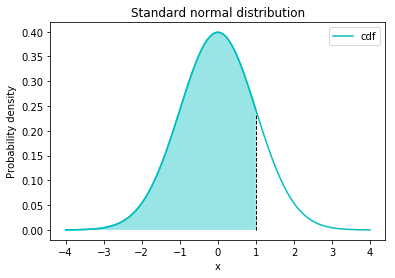

In [3]:
plt.title("Standard normal distribution")
plt.xlabel("x")
plt.ylabel("Probability density")
plt.plot(x1, y1, color="c", label="cdf")
plt.plot(x2, y2, color="c")
plt.fill_between(x2, 0, y2, facecolor='c', alpha=0.4)
plt.vlines(x=z_pos, ymin=-0, ymax=norm.pdf(z_pos,loc=center,scale=sigma),
           linestyles='dashed', linewidths=1)
plt.legend()

# 累積分布関数：Cumulative distribution function (cdf)
print(f"累積値:{norm.cdf(x=z_pos, loc=0, scale=1): 0.4f}")

In [4]:
# 正規分布表の生成（表5.1）
z = [k for k in np.arange(0,4,0.1)]
for k in z:
    print(f"{k:5.3f}  {norm.cdf(k, loc=0, scale=1):9.6f}")

0.000   0.500000
0.100   0.539828
0.200   0.579260
0.300   0.617911
0.400   0.655422
0.500   0.691462
0.600   0.725747
0.700   0.758036
0.800   0.788145
0.900   0.815940
1.000   0.841345
1.100   0.864334
1.200   0.884930
1.300   0.903200
1.400   0.919243
1.500   0.933193
1.600   0.945201
1.700   0.955435
1.800   0.964070
1.900   0.971283
2.000   0.977250
2.100   0.982136
2.200   0.986097
2.300   0.989276
2.400   0.991802
2.500   0.993790
2.600   0.995339
2.700   0.996533
2.800   0.997445
2.900   0.998134
3.000   0.998650
3.100   0.999032
3.200   0.999313
3.300   0.999517
3.400   0.999663
3.500   0.999767
3.600   0.999841
3.700   0.999892
3.800   0.999928
3.900   0.999952


In [5]:
# 標準正規分布の任意のパーセント点の算出
# 例：64％点（-∞からの面積が0．64となる点のx座標）
z = 0.64
print(f"{z*100:5.1f}%点： {norm.ppf(z, loc=0, scale=1):9.6f}")

 64.0%点：  0.358459


In [6]:
# 標準正規分布の主要パーセント点表（表7.1）
z = [0.9, 0.95, 0.975, 0.990, 0.995]
for k in z:
    print(f"{k:5.3f}  {norm.ppf(k, loc=0, scale=1):9.6f}")

0.900   1.281552
0.950   1.644854
0.975   1.959964
0.990   2.326348
0.995   2.575829


In [7]:
#Both sides
center = 0; sigma = 1
x1 = np.linspace(center - 4*sigma, center + 4*sigma, 100)
y1 = norm.pdf(x1, loc=center, scale=sigma)
x2 = np.linspace(center - 4*sigma, center + z_pos*sigma, 100)
y2 = norm.pdf(x2, loc=center, scale=sigma)

### $\sigma$ を単位とした信頼区間の設定
+ 自然科学では、90%, 95%, 99% 信頼区間の代わりに1$\sigma$, $2\sigma$, 3$\sigma$ 等がよく用いられる

区間 [-2.0*sigma, 2.0*sigma]に入る確率: 0.954


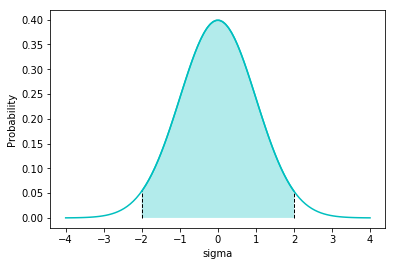

In [8]:
center = 0; sigma = 1
z_pos = 2

x1 = np.linspace(center - 4*sigma, center + 4*sigma, 100)
y1 = norm.pdf(x1, loc=center, scale=sigma)
x2 = np.linspace(center - z_pos*sigma, center + z_pos*sigma, 100)
y2 = norm.pdf(x2, loc=center, scale=sigma)

plt.plot(x1, y1, color="c")
plt.plot(x2, y2, color="c")
plt.fill_between(x2, 0, y2, facecolor='c', alpha=0.3)

plt.vlines(x=-z_pos, ymin=-0, ymax=norm.pdf(z_pos,loc=center,scale=sigma),
           linestyles='dashed', linewidths=1)
plt.vlines(x=z_pos, ymin=-0, ymax=norm.pdf(z_pos,loc=center,scale=sigma),
           linestyles='dashed', linewidths=1)

plt.xlabel("sigma")
plt.ylabel("Probability")
prob = 2*norm.cdf(x=z_pos, loc=center, scale=sigma)-1
print(f"区間 [{-z_pos: 0.1f}*sigma,{z_pos: 0.1f}*sigma]に入る確率:{prob: 0.3f}")

## 標準化変換

In [9]:
# p.5 表1.1 男子高校生100人の体重データ
weight = np.array([43.6, 45.2, 45.4, 45.8, 47.2, 47.8, 48.2, 48.7, 48.8, 48.9, 49.0, 49.0, 49.4,
49.5, 49.8, 50.4, 50.5, 50.9, 50.9, 51.2, 51.2, 51.2, 51.3, 51.3, 51.6, 51.7,
51.7, 51.8, 52.0, 52.0, 52.1, 52.1, 52.1, 52.2, 52.3, 52.7, 52.7, 52.8, 52.9,
52.9, 53.1, 53.1, 53.8, 54.0, 54.5, 54.5, 54.6, 54.7, 54.7, 54.7, 54.8, 54.9,
55.1, 55.1, 55.2, 55.3, 55.4, 55.4, 55.4, 55.6, 55.7, 55.8, 55.9, 56.1, 56.3,
56.3, 56.3, 56.4, 56.5, 56.7, 56.8, 57.0, 57.1, 57.1, 57.2, 57.3, 57.6, 57.7,
57.8, 58.1, 58.4, 58.6, 58.7, 58.7, 58.7, 58.7, 59.1, 59.3, 59.9, 60.0, 60.1,
60.3, 60.5, 60.6, 60.6, 60.7, 61.3, 62.7, 64.2, 64.6])

In [10]:
# 平均、標準偏差を計算
mu = weight.mean()
std = weight.std(ddof=0)

print(f"平均{mu: 0.2f}")
print(f"標準偏差{std: 0.2f}")

平均 54.46
標準偏差 4.22


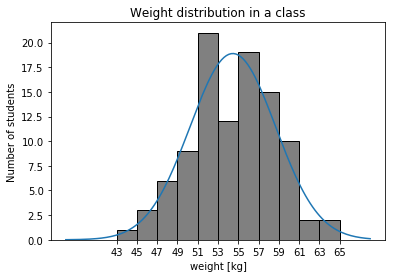

In [11]:
# ヒストグラムの表示
my_ticks = np.arange(43,67,2)
plt.xticks(my_ticks)
plt.title("Weight distribution in a class")
plt.xlabel("weight [kg]")
plt.ylabel("Number of students")
plt.hist(weight, bins=np.arange(43, 67, 2), color="gray", ec="black")

# 上で算出したパラメータを持つ正規分布の表示
x = np.linspace(38,68,128)
plt.plot(x, norm.pdf(x, loc=weight.mean(), scale=weight.std(ddof=0))*200);

In [12]:
# 体重データの標準化変換
z = (weight - mu)/std
z

array([-2.5713169 , -2.19252056, -2.14517102, -2.05047193, -1.71902514,
       -1.57697651, -1.48227742, -1.36390357, -1.3402288 , -1.31655403,
       -1.29287926, -1.29287926, -1.19818017, -1.1745054 , -1.10348109,
       -0.96143246, -0.93775769, -0.8430586 , -0.8430586 , -0.77203429,
       -0.77203429, -0.77203429, -0.74835952, -0.74835952, -0.6773352 ,
       -0.65366043, -0.65366043, -0.62998566, -0.58263612, -0.58263612,
       -0.55896135, -0.55896135, -0.55896135, -0.53528658, -0.51161181,
       -0.41691272, -0.41691272, -0.39323795, -0.36956318, -0.36956318,
       -0.32221364, -0.32221364, -0.15649024, -0.1091407 ,  0.00923316,
        0.00923316,  0.03290793,  0.0565827 ,  0.0565827 ,  0.0565827 ,
        0.08025747,  0.10393225,  0.15128179,  0.15128179,  0.17495656,
        0.19863133,  0.2223061 ,  0.2223061 ,  0.2223061 ,  0.26965564,
        0.29333042,  0.31700519,  0.34067996,  0.3880295 ,  0.43537904,
        0.43537904,  0.43537904,  0.45905381,  0.48272858,  0.53

In [13]:
# 平均と標準偏差を確認して標準化の効果を確認
mu_norm = z.mean()
std_norm = z.std(ddof=0)

print(f"平均 {mu_norm: 0.2f}")
print(f"標準偏差{std_norm: 0.2f}")

平均 -0.00
標準偏差 1.00


## 二項分布を正規分布で近似する
* 半整数補正

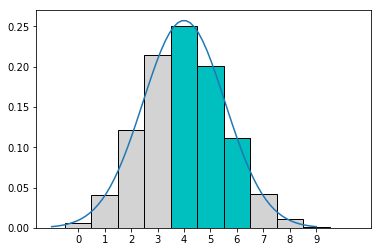

In [14]:
from scipy.stats import binom
from scipy.stats import norm
p = 0.4     # 成功確率
n = 10      # 試行回数
mu = n*p
std = np.sqrt(n*p*(1-p))

x = np.arange(0, n+1)  # 成功回数(list)
bi_dist = binom.pmf(x,n,p)
bar_color = np.array(['lightgray']*9)
bar_color[4:7]='c'
plt.bar(x, bi_dist, width=1, color=bar_color, ec="k")
my_ticks = np.arange(0,10)
plt.xticks(my_ticks)

x = np.linspace(-1,9,64)
plt.plot(x, norm.pdf(x, loc=mu, scale=std));  # 正規分布

In [15]:
norm.cdf(x=4, loc=mu, scale=std)

0.5

In [16]:
print(f"累積値(-inf, 6.5]:{norm.cdf(x=6.5, loc=mu, scale=std): 0.3f}")
print(f"累積値(-inf, 3.5]:{norm.cdf(x=3.5, loc=mu, scale=std): 0.3f}")

累積値(-inf, 6.5]: 0.947
累積値(-inf, 3.5]: 0.373


In [17]:
# x=3.5 と x=6.5 の間の面積(正規近似)
tmp = norm.cdf(x=6.5,loc=mu,scale=std) - norm.cdf(x=3.5,loc=mu,scale=std)
print(f"累積値 @[3.5, 6.5]:{tmp: 0.3f}")

累積値 @[3.5, 6.5]: 0.573
